In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
train_df = pd.read_csv('../input/digit-recognizer/train.csv')
train_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test_df = pd.read_csv('../input/digit-recognizer/test.csv')
test_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X = train_df.iloc[:,1:].values
y = train_df.label

In [5]:
print(X.shape)
print(y.shape)

(42000, 784)
(42000,)


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
from random import randint

In [7]:
X[324]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  51, 133, 243, 196, 134, 133,  59,  13,  10,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0, 128, 238, 253, 253, 254, 253, 253, 253,
       227, 145,  39,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,  37, 206, 217, 218, 220,
       253, 253, 253, 253, 221,  98,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

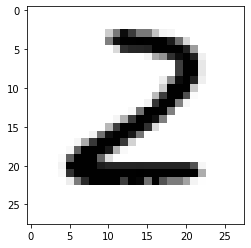

In [8]:
plt.imshow(X[324].reshape(28, 28), cmap='gray_r')

In [9]:
X = X.astype('float32')
y = y.values.reshape(y.shape[0], 1).astype('int32')

X /= 255

In [10]:
y

array([[1],
       [0],
       [1],
       ...,
       [7],
       [6],
       [9]], dtype=int32)

In [11]:
import tensorflow as tf

y = tf.keras.utils.to_categorical(y, 10)

In [12]:
print(y[2])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [13]:
ann = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=512, input_shape=[784], activation='relu'),
    tf.keras.layers.Dense(units=512, activation='sigmoid'),
    tf.keras.layers.Dense(units=10, activation='softmax'),
])

In [14]:
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [15]:
ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
history = ann.fit(X, y, epochs=8, validation_split=0.4, batch_size=50)

Epoch 1/8
504/504 [==============================] - 2s 4ms/step - loss: 0.3316 - accuracy: 0.8997 - val_loss: 0.1912 - val_accuracy: 0.9396
Epoch 2/8
504/504 [==============================] - 1s 3ms/step - loss: 0.1240 - accuracy: 0.9625 - val_loss: 0.1200 - val_accuracy: 0.9629
Epoch 3/8
504/504 [==============================] - 1s 3ms/step - loss: 0.0775 - accuracy: 0.9760 - val_loss: 0.0980 - val_accuracy: 0.9698
Epoch 4/8
504/504 [==============================] - 1s 3ms/step - loss: 0.0511 - accuracy: 0.9848 - val_loss: 0.1119 - val_accuracy: 0.9660
Epoch 5/8
504/504 [==============================] - 2s 4ms/step - loss: 0.0396 - accuracy: 0.9877 - val_loss: 0.0909 - val_accuracy: 0.9715
Epoch 6/8
504/504 [==============================] - 1s 3ms/step - loss: 0.0279 - accuracy: 0.9912 - val_loss: 0.1001 - val_accuracy: 0.9720
Epoch 7/8
504/504 [==============================] - 1s 3ms/step - loss: 0.0180 - accuracy: 0.9944 - val_loss: 0.1089 - val_accuracy: 0.9707
Epoch 8/8
504

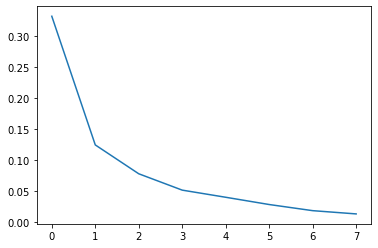

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['loss'])
plt.show()

In [18]:
# test_input = test_df.values.astype('float32')
# test_input /= 255
# results = ann.predict_classes(test_input)

In [19]:
# submissions=pd.DataFrame({"ImageId": list(range(1,len(results)+1)),
#                          "Label": results})
# submissions.to_csv("submission.csv", index=False, header=True)

# using cnn

In [20]:
X = X.reshape(X.shape[0], 28, 28, 1)

In [21]:
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', input_shape=[28, 28, 1]),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Dropout(0.25), 
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10, activation='softmax'),
])
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)              

In [22]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    min_delta=0.001, 
    patience=5, 
    restore_best_weights=True,
)

In [24]:
history = cnn.fit(X, y, epochs=50, batch_size=32 ,validation_split=0.4, callbacks=[early_stopping])

Epoch 1/50
788/788 [==============================] - 3s 4ms/step - loss: 0.6034 - accuracy: 0.8011 - val_loss: 0.1578 - val_accuracy: 0.9528
Epoch 2/50
788/788 [==============================] - 3s 4ms/step - loss: 0.2484 - accuracy: 0.9248 - val_loss: 0.1066 - val_accuracy: 0.9680
Epoch 3/50
788/788 [==============================] - 3s 4ms/step - loss: 0.1907 - accuracy: 0.9418 - val_loss: 0.0927 - val_accuracy: 0.9717
Epoch 4/50
788/788 [==============================] - 3s 4ms/step - loss: 0.1647 - accuracy: 0.9493 - val_loss: 0.0724 - val_accuracy: 0.9775
Epoch 5/50
788/788 [==============================] - 3s 4ms/step - loss: 0.1464 - accuracy: 0.9560 - val_loss: 0.0661 - val_accuracy: 0.9795
Epoch 6/50
788/788 [==============================] - 3s 4ms/step - loss: 0.1368 - accuracy: 0.9576 - val_loss: 0.0591 - val_accuracy: 0.9818
Epoch 7/50
788/788 [==============================] - 3s 4ms/step - loss: 0.1205 - accuracy: 0.9626 - val_loss: 0.0551 - val_accuracy: 0.9832
Epoch 

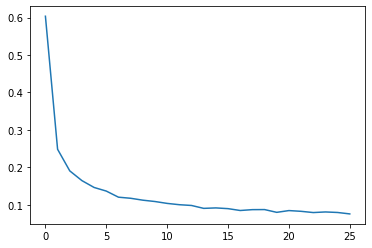

In [25]:
plt.plot(history.history['loss'])
plt.show()

In [26]:
test_input = test_df.values.astype('float32')
test_input /= 255
test_input = test_input.reshape(test_input.shape[0], 28, 28, 1)
results = cnn.predict_classes(test_input)
submissions=pd.DataFrame({"ImageId": list(range(1,len(results)+1)),
                         "Label": results})
submissions.to_csv("submission.csv", index=False, header=True)